## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
data_merge.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_merge.sort_values('Mouse ID')
data_merge_clean = data_merge.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
data_merge_clean.sort_values('Mouse ID')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
459,a203,Infubinol,Female,20,23,25,56.793208,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data_merge[data_merge.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned_merge = data_merge.drop_duplicates()
data_cleaned_merge.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
data_cleaned_merge.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_grouped_1 = data_cleaned_merge.groupby(['Drug Regimen'])
mean = regimen_grouped_1['Tumor Volume (mm3)'].mean()
median = regimen_grouped_1['Tumor Volume (mm3)'].median()
variance = regimen_grouped_1['Tumor Volume (mm3)'].var()
std = regimen_grouped_1['Tumor Volume (mm3)'].std()
sem = regimen_grouped_1['Tumor Volume (mm3)'].sem()
tumor_stats1 = pd.DataFrame({'Drug Regimen': regimen_grouped_1['Drug Regimen'],
                            'Mean':mean,
                            'Median':median,
                            'Var':variance,
                            'STD':std,
                            'SEM':sem})
tumor_stats1

,Drug Regimen,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,,
Capomulin,"(Capomulin, [Capomulin, Capomulin, Capomulin, ...",40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,"(Ceftamin, [Ceftamin, Ceftamin, Ceftamin, Ceft...",52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,"(Infubinol, [Infubinol, Infubinol, Infubinol, ...",52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,"(Ketapril, [Ketapril, Ketapril, Ketapril, Keta...",55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,"(Naftisol, [Naftisol, Naftisol, Naftisol, Naft...",54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,"(Placebo, [Placebo, Placebo, Placebo, Placebo,...",54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,"(Propriva, [Propriva, Propriva, Propriva, Prop...",52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,"(Ramicane, [Ramicane, Ramicane, Ramicane, Rami...",40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,"(Stelasyn, [Stelasyn, Stelasyn, Stelasyn, Stel...",54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_summary = data_cleaned_merge[['Drug Regimen','Tumor Volume (mm3)']]
regimen_grouped = tumor_summary.groupby(['Drug Regimen'])
regimen_grouped.head()
tumor_stats = pd.DataFrame({'Mean': regimen_grouped['Tumor Volume (mm3)'].mean(),
                           'Median': regimen_grouped['Tumor Volume (mm3)'].median(),
                           'Variance': regimen_grouped['Tumor Volume (mm3)'].var(),
                           'Standard Deviation': regimen_grouped['Tumor Volume (mm3)'].std(),
                           "SEM":regimen_grouped['Tumor Volume (mm3)'].sem()})
tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

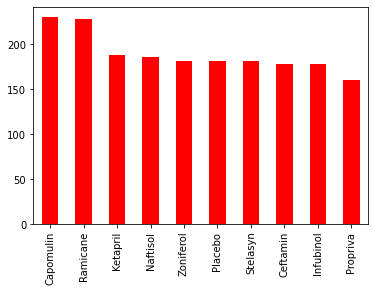

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_regimen = data_cleaned_merge['Drug Regimen'].value_counts()
mice_regimen
mice_regimen.plot(kind="bar", facecolor="red")


In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = data_cleaned_merge['Drug Regimen'].unique()
mice_per_regimen = data_cleaned_merge['Drug Regimen']
mice_per_regimen=mice_per_regimen.value_counts()
x_axis = np.arange(len(mice_per_regimen))
mice_ordered=mice_per_regimen.sort_values(ascending=False)
mice_ordered

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Drug Regimen, dtype: int64

(0.0, 240.0)

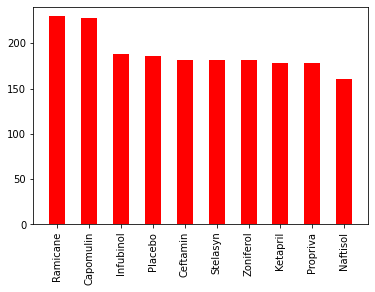

In [12]:
plt.bar(x_axis, mice_ordered,width=.5, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_per_regimen)+10)

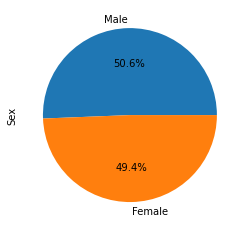

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_count = data_cleaned_merge['Sex'].value_counts()
mouse_sex_count.plot(kind='pie', autopct='%1.1f%%')
plt.show()

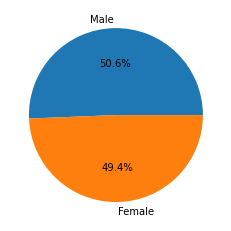

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_count = data_cleaned_merge['Sex'].value_counts()
mouse_sex = data_cleaned_merge['Sex'].unique()
plt.pie(mouse_sex_count, labels=mouse_sex,
        autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#timepoint_45 = data_cleaned_merge.loc[data_cleaned_merge['Timepoint'] == 45]
#timepoint_45 = timepoint_45[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
#timepoint_45


# Start by getting the last (greatest) timepoint for each mouse
grouped_max = data_cleaned_merge.groupby('Mouse ID')['Timepoint'].max()
grouped_max.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grouped_max = pd.merge(grouped_max,data_cleaned_merge,on=['Timepoint','Mouse ID'], how='left')
grouped_max
#grouped_max = data_cleaned_merge.merge(grouped_max, on='Mouse ID'

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,10,z435,Propriva,Female,12,26,48.710661,0
245,45,z578,Ramicane,Male,11,16,30.638696,0
246,45,z581,Infubinol,Female,24,25,62.754451,3
247,45,z795,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = grouped_max['Tumor Volume (mm3)'].quantile([.25,.50,.75])
lowerq=quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq
meadianq = quartiles[.50]

potential_outliers = []

low_lim = lowerq - 1.5 * IQR 
up_lim = upperq + 1.5 * IQR

for x in data_cleaned_merge['Tumor Volume (mm3)']: 
    if ((x> up_lim) or (x<low_lim)): 
         potential_outliers.append(x) 
potential_outliers

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

# tumor_df = grouped_max.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
# tumor_volume = [volume for volume in grouped_max['Tumor Volume (mm3)']]
# plt.boxplot(tumor_volume, labels=treatments)
# plt.ylim(10,80)
# plt.show()

[]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

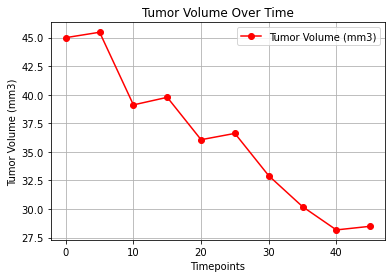

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
sample_mouse = data_cleaned_merge[(data_cleaned_merge['Drug Regimen'] == 'Capomulin')
                                  & (data_cleaned_merge['Mouse ID'] == 'x401')]
sample_mouse
timepoints = sample_mouse['Timepoint']
tumor_volume = sample_mouse['Tumor Volume (mm3)']
tumor_over_time, = plt.plot(timepoints, tumor_volume,marker='o', color="red", label="Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time")
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend(handles=[tumor_over_time])
           

Text(0.5, 1.0, 'Mouse Weight Vs. Tumor Volume')

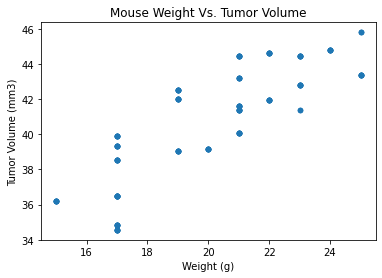

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_reg = data_cleaned_merge.loc[(data_cleaned_merge['Drug Regimen'] == 'Capomulin')]
cap_reg

mouse_weight = cap_reg[['Weight (g)', 'Mouse ID']]
tumor_vol = cap_reg.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
tumor_vol.reset_index()
mouse_weight.reset_index()
weight_vs_volume = pd.merge(tumor_vol, mouse_weight, on='Mouse ID', how='inner')
weight_vs_volume

ax1 = weight_vs_volume.plot.scatter(x='Weight (g)',
                      y='Tumor Volume (mm3)',
                      marker='o')
plt.title('Mouse Weight Vs. Tumor Volume')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [20]:
correlation = st.pearsonr(weight_vs_volume['Weight (g)'],
                          weight_vs_volume['Tumor Volume (mm3)'] )
print(f"The correlation between tumor volume and overall mouse weight is {round(correlation[0],2)}.")

The correlation between tumor volume and overall mouse weight is 0.83.


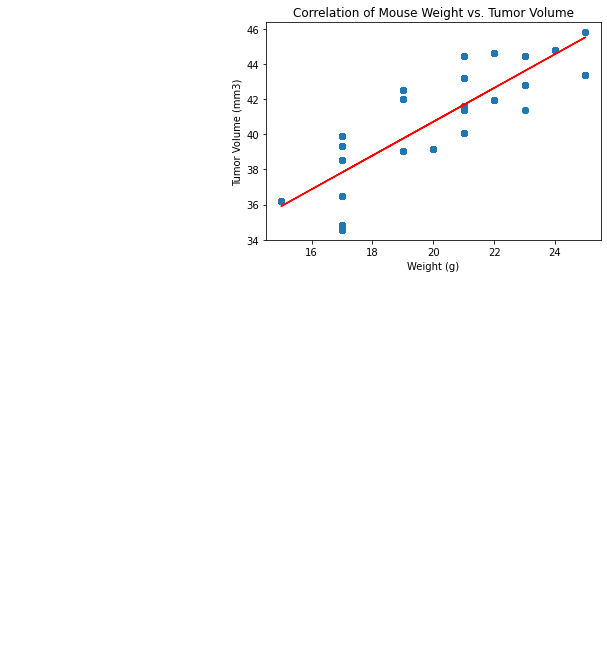

In [22]:
x_values = weight_vs_volume['Weight (g)']
y_values = weight_vs_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Correlation of Mouse Weight vs. Tumor Volume")
plt.show()